In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [3]:
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45206,administrative_staff,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted
45207,independent_worker,49,college,married,unidentified,May,13,98,1,unidentified,not_converted
45208,executive,30,college,married,mobile,June,12,175,2,other_outcome,not_converted
45209,retired_worker,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted


In [4]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [5]:
df.call_duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: call_duration, dtype: float64

In [6]:
df.conversion_status.describe()

count             45211
unique                2
top       not_converted
freq              39922
Name: conversion_status, dtype: object

In [7]:
df.conversion_status.value_counts()

not_converted    39922
converted         5289
Name: conversion_status, dtype: int64

In [8]:
df.occupation.value_counts()

manual_worker           9732
executive               9458
technical_specialist    7597
administrative_staff    5171
service_worker          4154
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: occupation, dtype: int64

In [9]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


Exploratory data analysis

In [10]:
pd.crosstab(index = df['occupation'], columns = df['conversion_status'])

conversion_status,converted,not_converted
occupation,,
administrative_staff,631,4540
business_owner,123,1364
domestic_worker,109,1131
executive,1301,8157
independent_worker,187,1392
jobless,202,1101
manual_worker,708,9024
retired_worker,516,1748
service_worker,369,3785


In [11]:
df['Age_Group'] = pd.cut(df['age'], bins = 5, labels = ['18-30', '31-55', '55-70', '70-90', '90_more'])

In [12]:
#df['Age_Group'] = pd.cut(df['age'], bins = 4, labels = ['18-30', '31-55', '55-70', '70-90_more'])

In [13]:
df.groupby('occupation')['Age_Group'].value_counts()

occupation            Age_Group
administrative_staff  31-55        2474
                      18-30        1690
                      55-70         995
                      70-90          12
business_owner        31-55         783
                      55-70         410
                      18-30         288
                      70-90           5
                      90_more         1
domestic_worker       31-55         529
                      55-70         522
                      18-30         159
                      70-90          22
                      90_more         8
executive             31-55        4640
                      18-30        2686
                      55-70        2090
                      70-90          40
                      90_more         2
independent_worker    31-55         759
                      18-30         447
                      55-70         365
                      70-90           8
jobless               31-55         627
        

In [14]:
pd.crosstab(index = df['occupation'], columns = df['Age_Group'])

Age_Group,18-30,31-55,55-70,70-90,90_more
occupation,,,,,
administrative_staff,1690,2474,995,12,0
business_owner,288,783,410,5,1
domestic_worker,159,529,522,22,8
executive,2686,4640,2090,40,2
independent_worker,447,759,365,8,0
jobless,352,627,320,4,0
manual_worker,2688,5085,1953,6,0
retired_worker,6,112,1471,557,118
service_worker,1445,1980,728,1,0


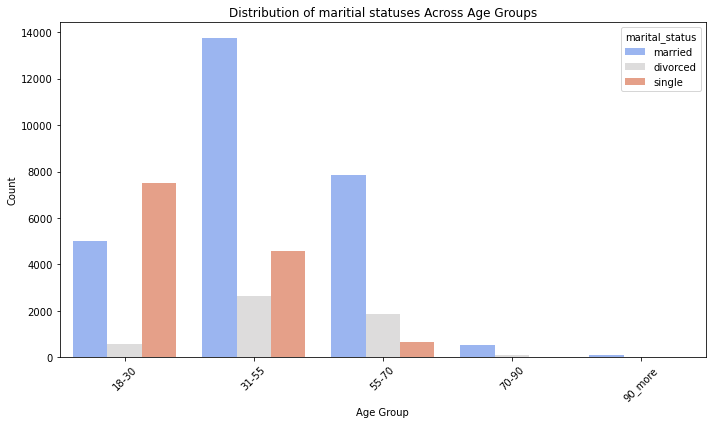

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Age_Group', hue = 'marital_status', data = df, palette = 'coolwarm')
plt.title("Distribution of maritial statuses Across Age Groups")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'marital_status')
plt.tight_layout()
plt.show()

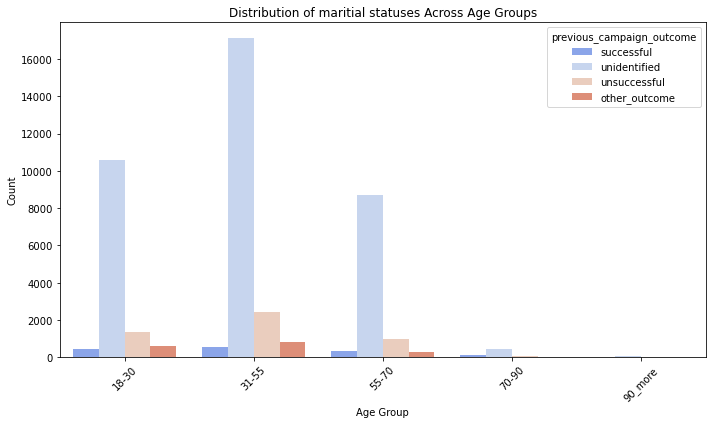

In [16]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Age_Group', hue = 'previous_campaign_outcome', data = df, palette = 'coolwarm')
plt.title("Distribution of maritial statuses Across Age Groups")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title = 'previous_campaign_outcome')
plt.tight_layout()
plt.show()

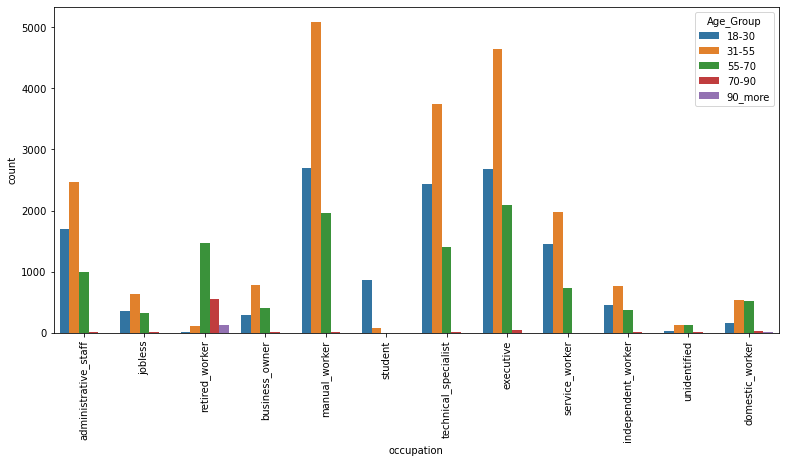

In [17]:
#barplot for occupation vs age group
#sns.barplot(x=occupation.index, y=Age Group.values, hue=occupation.index)
plt.figure(figsize=(13,6))
sns.countplot(data = df,x='occupation', hue='Age_Group')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,Age_Group
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted,18-30
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted,55-70
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted,31-55
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted,55-70
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted,31-55


In [19]:
#drop Age_Group
df = df.drop(columns = 'Age_Group')
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [20]:
pd.crosstab(index = df['education_level'], columns = df['conversion_status'])

conversion_status,converted,not_converted
education_level,,
college,1996,11305
elementary_school,591,6260
high_school,2450,20752
unidentified,252,1605


<AxesSubplot:xlabel='conversion_status', ylabel='count'>

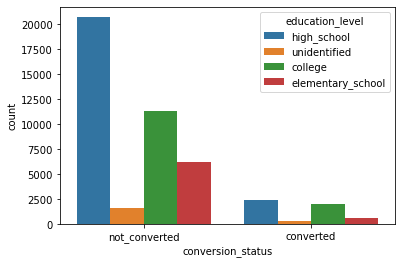

In [21]:
sns.countplot(data = df, x = 'conversion_status', hue = 'education_level')

In [22]:
pd.crosstab(index = df['marital_status'],columns = df['communication_channel'])

communication_channel,landline,mobile,unidentified
marital_status,,,
divorced,271,3326,1610
married,2015,17168,8031
single,620,8791,3379


<AxesSubplot:xlabel='marital_status', ylabel='count'>

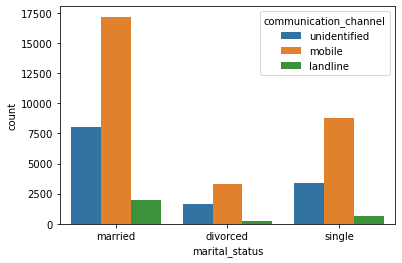

In [23]:
sns.countplot(data = df ,x = 'marital_status',hue = 'communication_channel')

In [24]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [25]:
#np.round use to round the data value
np.round(pd.pivot_table(df, index = 'call_day', columns = 'call_month', values = 'call_duration', fill_value = 0))

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,375.0,11.0,0.0,291.0,0.0,280.0,266.0,35.0,0.0,0.0,217.0,283.0
2,385.0,289.0,323.0,243.0,0.0,264.0,238.0,258.0,0.0,151.0,293.0,292.0
3,328.0,375.0,352.0,258.0,0.0,283.0,265.0,264.0,0.0,310.0,0.0,332.0
4,0.0,270.0,375.0,263.0,0.0,262.0,250.0,282.0,265.0,196.0,8.0,272.0
5,386.0,306.0,152.0,267.0,0.0,133.0,264.0,172.0,270.0,231.0,7.0,12.0
6,375.0,286.0,0.0,235.0,66.0,250.0,234.0,210.0,260.0,222.0,387.0,254.0
7,298.0,235.0,302.0,0.0,81.0,269.0,103.0,0.0,281.0,0.0,295.0,295.0
8,330.0,222.0,170.0,270.0,213.0,284.0,190.0,247.0,242.0,225.0,267.0,291.0
9,288.0,238.0,313.0,173.0,0.0,255.0,247.0,255.0,258.0,276.0,462.0,353.0


In [26]:
pd.crosstab(index = df['call_day'], columns = df['call_month'], values = df['call_duration'], aggfunc = sum)

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,17603.0,11.0,NaN,2620.0,NaN,20474.0,28155.0,70.0,NaN,NaN,7168.0,14433.0
2,19267.0,7217.0,1615.0,125879.0,NaN,19500.0,121634.0,12360.0,NaN,4670.0,2342.0,7007.0
3,20352.0,6006.0,4570.0,88744.0,NaN,28549.0,121257.0,7646.0,NaN,6811.0,NaN,11607.0
4,NaN,62017.0,6746.0,121791.0,NaN,23833.0,82905.0,4227.0,63961.0,3927.0,46.0,8160.0
5,7341.0,74781.0,303.0,117899.0,NaN,933.0,113709.0,7415.0,190105.0,3228.0,20.0,24.0
6,27020.0,87111.0,NaN,56533.0,132.0,4497.0,93300.0,1260.0,213600.0,2669.0,11599.0,7107.0
7,25022.0,82833.0,7844.0,NaN,324.0,104490.0,515.0,NaN,250702.0,NaN,6491.0,12666.0
8,36319.0,72893.0,170.0,5933.0,1064.0,113644.0,5505.0,3457.0,203828.0,4055.0,8796.0,11916.0
9,24770.0,3090.0,6261.0,36705.0,NaN,88945.0,85827.0,5614.0,110877.0,9929.0,1386.0,15514.0


In [27]:
pd.crosstab(index = df['conversion_status'], columns = df['previous_campaign_outcome'])

previous_campaign_outcome,other_outcome,successful,unidentified,unsuccessful
conversion_status,,,,
converted,307,978,3386,618
not_converted,1533,533,33573,4283


<AxesSubplot:xlabel='conversion_status', ylabel='count'>

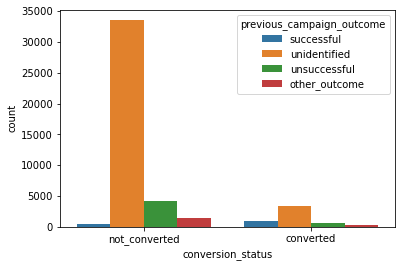

In [28]:
sns.countplot(data = df, x = 'conversion_status', hue = 'previous_campaign_outcome')

In [29]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [30]:
df.occupation.value_counts() #pd.get_dummies

manual_worker           9732
executive               9458
technical_specialist    7597
administrative_staff    5171
service_worker          4154
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: occupation, dtype: int64

Encoding

In [31]:
occ = pd.get_dummies(df, columns = ['occupation'], dtype = 'int', drop_first = True)

In [32]:
occ

,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,28,high_school,married,unidentified,September,9,1,1,successful,not_converted,...,0,0,0,0,0,0,0,0,0,0
1,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0
2,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted,...,0,0,0,1,0,0,0,0,0,0
3,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted,...,0,0,0,0,0,1,0,0,0,0
4,43,college,married,landline,July,29,184,4,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted,...,0,0,0,0,0,0,0,0,0,0
45207,49,college,married,unidentified,May,13,98,1,unidentified,not_converted,...,0,0,1,0,0,0,0,0,0,0
45208,30,college,married,mobile,June,12,175,2,other_outcome,not_converted,...,0,1,0,0,0,0,0,0,0,0
45209,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df = pd.concat([df['occupation'], occ], axis = 1)

In [34]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,...,0,0,0,0,0,0,0,0,0,0
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,...,0,0,0,0,0,0,0,0,0,0
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,...,0,0,0,1,0,0,0,0,0,0
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,...,0,0,0,0,0,1,0,0,0,0
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,...,0,0,0,0,0,0,0,0,0,0


preprocessing

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
enc = OrdinalEncoder()
df['education_level'] = enc.fit_transform(df[['education_level']])

In [37]:
df.head(20)

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,administrative_staff,28,2.0,married,unidentified,September,9,1,1,successful,...,0,0,0,0,0,0,0,0,0,0
1,administrative_staff,58,3.0,married,unidentified,June,5,307,2,unidentified,...,0,0,0,0,0,0,0,0,0,0
2,jobless,40,2.0,divorced,mobile,February,4,113,1,unidentified,...,0,0,0,1,0,0,0,0,0,0
3,retired_worker,63,2.0,married,mobile,April,7,72,5,unidentified,...,0,0,0,0,0,1,0,0,0,0
4,business_owner,43,0.0,married,landline,July,29,184,4,unidentified,...,0,0,0,0,0,0,0,0,0,0
5,manual_worker,39,1.0,married,unidentified,June,6,158,2,unidentified,...,0,0,0,0,1,0,0,0,0,0
6,business_owner,42,0.0,divorced,mobile,July,10,563,1,unidentified,...,0,0,0,0,0,0,0,0,0,0
7,retired_worker,68,0.0,married,mobile,August,4,651,1,successful,...,0,0,0,0,0,1,0,0,0,0
8,student,22,0.0,single,mobile,November,30,260,5,successful,...,0,0,0,0,0,0,0,1,0,0
9,technical_specialist,53,2.0,married,landline,July,29,99,5,unidentified,...,0,0,0,0,0,0,0,0,1,0


In [38]:
df.education_level.value_counts() #ordinal Encoder #lamda

2.0    23202
0.0    13301
1.0     6851
3.0     1857
Name: education_level, dtype: int64

In [39]:
df.marital_status.value_counts()

married     27214
single      12790
divorced     5207
Name: marital_status, dtype: int64

In [40]:
df['marital_status'] = list(map(lambda x: 0 if x == 'married' else (1 if x == 'single' else 2), df['marital_status']))

In [41]:
df.marital_status.value_counts()

0    27214
1    12790
2     5207
Name: marital_status, dtype: int64

In [42]:
df.communication_channel.value_counts()

mobile          29285
unidentified    13020
landline         2906
Name: communication_channel, dtype: int64

In [43]:
df['communication_channel'] = list(map(lambda x: 0 if x == 'mobile' else (1 if x == 'unidentified ' else 2), df['communication_channel']))

In [44]:
df.communication_channel.value_counts()

0    29285
2    15926
Name: communication_channel, dtype: int64

In [108]:
df.call_month.value_counts()

May          13766
July          6895
August        6247
June          5341
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
Name: call_month, dtype: int64

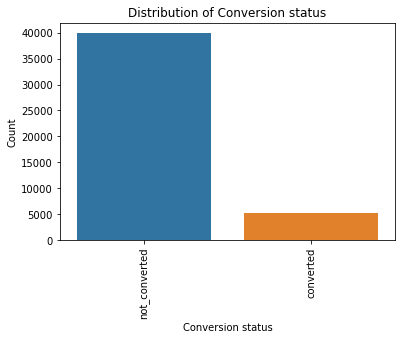

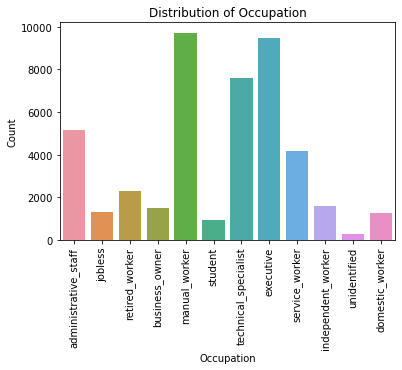

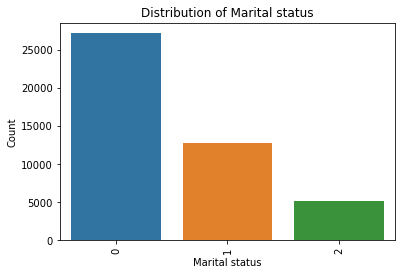

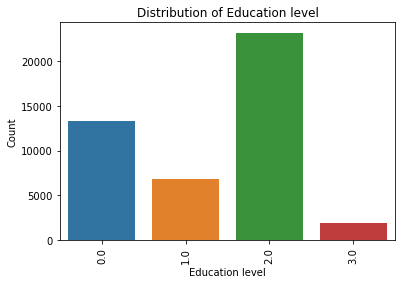

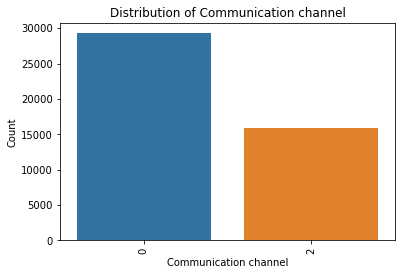

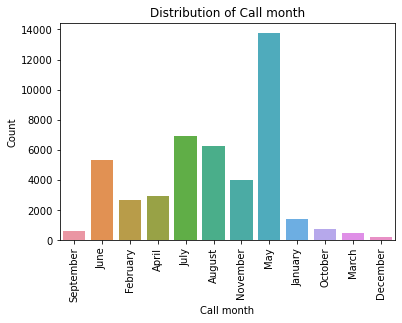

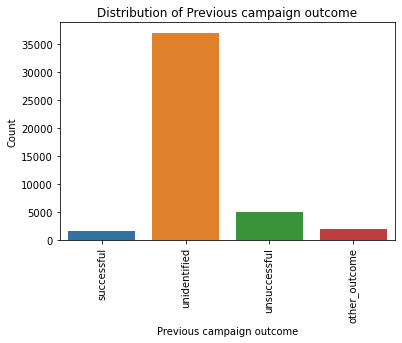

In [45]:
variables = ['conversion_status','occupation', 'marital_status', 'education_level', 'communication_channel', 'call_month', 'previous_campaign_outcome']

count_plots = {}

for var in variables:
    count_plots[var + '_ax'] = sns.countplot(x=var, data=df)
    plt.xticks(rotation=90)  
    plt.xlabel(var.capitalize().replace('_', ' '))
    plt.ylabel('Count')
    plt.title('Distribution of ' + var.capitalize().replace('_', ' '))
    plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

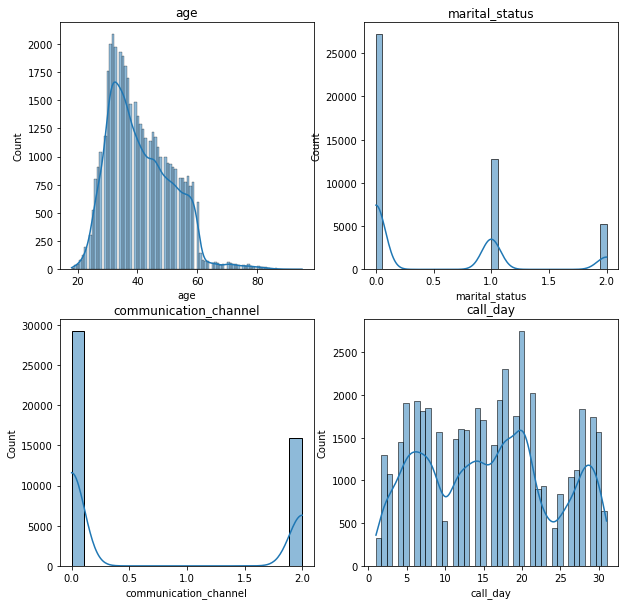

In [47]:
# Create a heatmap
#sns.heatmap(data = df, annot=True, cmap="coolwarm")
# Show the plot
#plt.show()
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(exclude=['int64']).columns

f, ax = plt.subplots(2,2, figsize=(10, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x = cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()  